<a href="https://colab.research.google.com/github/Tom-Yuen/TomY_Little_Projects/blob/main/Best_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Optimizing Decision-Making: Finding the Balance in Socratic Tree Selection

In this exploration inspired by a Socratic story, we sought to determine the best strategy for selecting a high-quality tree from an unknown number of trees in a forest. The strategy involved setting a learning phase, where the first few trees were observed but not selected. After the learning phase, the next tree exceeding the best observed quality was chosen.

Through 10,000 simulations with learning phases ranging from 1 to 60 trees, several key insights were gained:

Learning Phase 1: With an average tree quality of 7.407 and a success rate of 51.05%, this phase showed a moderate chance of picking a good tree but left a 0.93% chance of no tree being picked at all.

Learning Phase 2-6: As the learning phase increased, the success rate improved significantly, reaching 86.02% by the 6th phase, with an average tree quality of 8.708. The chance of picking no tree also increased slightly to 5.81%.

Learning Phase 7-12: The success rate continued to climb, peaking at around 87.47% with the 8th phase. However, beyond this point, the success rate began to plateau, while the probability of not picking any tree increased sharply.

Learning Phase 13-30: As the learning phase extended further, the quality of the selected tree began to decline slightly, and the chances of not picking a tree increased dramatically, with over 30% of cases ending without a selection by the 30th phase.

Learning Phase 31-60: Extended learning phases led to diminishing returns, with the average quality of selected trees dropping below 7.0, and the no-selection rate exceeding 50% after 50 trees.

Final Insight: The optimal balance was observed around a learning phase of 7-12 trees, where the success rate was high, and the risk of not selecting any tree remained relatively low. Extending the learning phase beyond this range often led to indecision, resulting in lower overall success and higher rates of not picking any tree at all.

In [18]:
def pick_tree_and_threshold(learning_phase):
    n_trees = np.random.randint(80, 121)
    tree_qualities = np.random.uniform(0, 10, size=n_trees)
    threshold_quality = np.max(tree_qualities[:min(learning_phase, n_trees)])

    chosen_tree_quality = 0
    for i in range(min(learning_phase, n_trees), n_trees):
        if tree_qualities[i] >= threshold_quality:
            chosen_tree_quality = tree_qualities[i]
            break

    return chosen_tree_quality, threshold_quality

def evaluate_strategy_with_threshold(learning_phases, n_simulations=10000):
    results = {}

    for learning_phase in learning_phases:
        chosen_qualities = []
        thresholds = []
        no_tree_count = 0

        for _ in range(n_simulations):
            quality, threshold = pick_tree_and_threshold(learning_phase)
            if quality == 0:
                no_tree_count += 1
            chosen_qualities.append(quality)
            thresholds.append(threshold)

        average_quality = np.mean(chosen_qualities)
        std_dev_quality = np.std(chosen_qualities)

        success_rate = np.mean([1 if q >= 8 else 0 for q in chosen_qualities])
        std_dev_success_rate = np.std([1 if q >= 8 else 0 for q in chosen_qualities])

        no_tree_percentage = no_tree_count / n_simulations

        # Analyze threshold quality distribution
        avg_threshold = np.mean(thresholds)
        std_dev_threshold = np.std(thresholds)

        results[learning_phase] = (average_quality, std_dev_quality, success_rate, std_dev_success_rate, no_tree_percentage, avg_threshold, std_dev_threshold)

    return results

# Define the learning phases to test (1 to 60)
learning_phases = list(range(1, 61))

# Evaluate the strategy for each learning phase
results = evaluate_strategy_with_threshold(learning_phases)

# Print the results
for phase, (avg_quality, std_dev_quality, success_rate, std_dev_success_rate, no_tree_percentage, avg_threshold, std_dev_threshold) in results.items():
    print(f"Learning Phase: {phase} trees - Average Quality: {avg_quality:.3f} ± {std_dev_quality:.3f}, "
          f"Success Rate: {success_rate:.2%} ± {std_dev_success_rate:.3f}, "
          f"No Tree Picked: {no_tree_percentage:.2%}, "
          f"Average Threshold Quality: {avg_threshold:.3f} ± {std_dev_threshold:.3f}")


Learning Phase: 1 trees - Average Quality: 7.407 ± 2.295, Success Rate: 51.05% ± 0.500, No Tree Picked: 0.93%, Average Threshold Quality: 4.997 ± 2.872
Learning Phase: 2 trees - Average Quality: 8.099 ± 2.074, Success Rate: 66.02% ± 0.474, No Tree Picked: 2.24%, Average Threshold Quality: 6.677 ± 2.368
Learning Phase: 3 trees - Average Quality: 8.448 ± 1.973, Success Rate: 74.85% ± 0.434, No Tree Picked: 2.91%, Average Threshold Quality: 7.481 ± 1.939
Learning Phase: 4 trees - Average Quality: 8.583 ± 2.131, Success Rate: 80.70% ± 0.395, No Tree Picked: 4.42%, Average Threshold Quality: 8.038 ± 1.608
Learning Phase: 5 trees - Average Quality: 8.623 ± 2.268, Success Rate: 83.50% ± 0.371, No Tree Picked: 5.40%, Average Threshold Quality: 8.309 ± 1.433
Learning Phase: 6 trees - Average Quality: 8.708 ± 2.310, Success Rate: 86.02% ± 0.347, No Tree Picked: 5.81%, Average Threshold Quality: 8.578 ± 1.230
Learning Phase: 7 trees - Average Quality: 8.666 ± 2.496, Success Rate: 86.75% ± 0.339, 

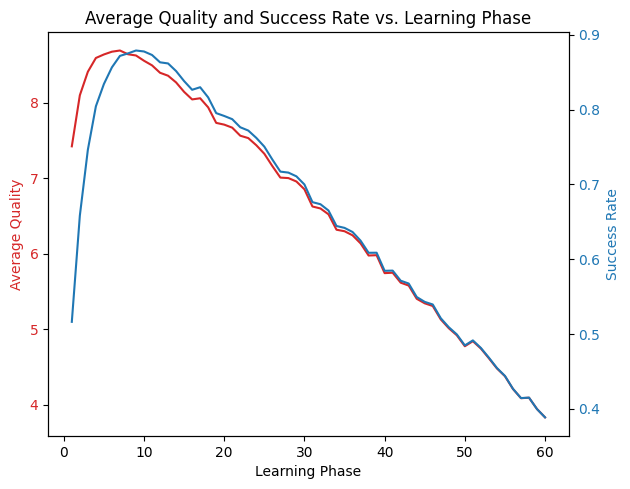

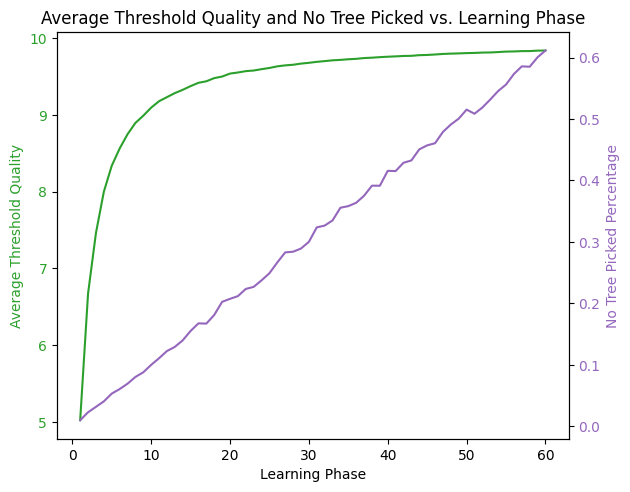

In [25]:
# prompt: plot one chart with 2 line and 2 y-axis, one for average quality, and one for success rate, learning phase being x-axis, and then another chart of average threshold quality and no tree picked

import matplotlib.pyplot as plt

# Extract data for plotting
phases = list(results.keys())
avg_qualities = [result[0] for result in results.values()]
success_rates = [result[2] for result in results.values()]
no_tree_percentages = [result[4] for result in results.values()]
avg_thresholds = [result[5] for result in results.values()]

# Create the first plot with two y-axes
fig, ax1 = plt.subplots()

# Plot average quality
color = 'tab:red'
ax1.set_xlabel('Learning Phase')
ax1.set_ylabel('Average Quality', color=color)
ax1.plot(phases, avg_qualities, color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis for success rate
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Success Rate', color=color)
ax2.plot(phases, success_rates, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('Average Quality and Success Rate vs. Learning Phase')
plt.show()

# Create the second plot for threshold and no-tree percentage
fig, ax1 = plt.subplots()

# Plot average threshold quality
color = 'tab:green'
ax1.set_xlabel('Learning Phase')
ax1.set_ylabel('Average Threshold Quality', color=color)
ax1.plot(phases, avg_thresholds, color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis for no-tree percentage
ax2 = ax1.twinx()
color = 'tab:purple'
ax2.set_ylabel('No Tree Picked Percentage', color=color)
ax2.plot(phases, no_tree_percentages, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('Average Threshold Quality and No Tree Picked vs. Learning Phase')
plt.show()
